In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/meta-kaggle")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/meta-kaggle


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import pandas as pd

In [3]:
# Load Forum related datasets
forum_message_reactions = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessageReactions.csv')
forum_message_votes = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessageVotes.csv')
forum_messages = pd.read_csv('/kaggle/input/meta-kaggle/ForumMessages.csv')
forum_topics = pd.read_csv('/kaggle/input/meta-kaggle/ForumTopics.csv')
forums = pd.read_csv('/kaggle/input/meta-kaggle/Forums.csv')

In [4]:
forums.iloc[0]

Id                                                          993740
ParentForumId                                               1023.0
Title            Banco de Dados  Art 44 ANPOCS Zelinski et al 2020
Name: 0, dtype: object

In [5]:
len(forums)

570744

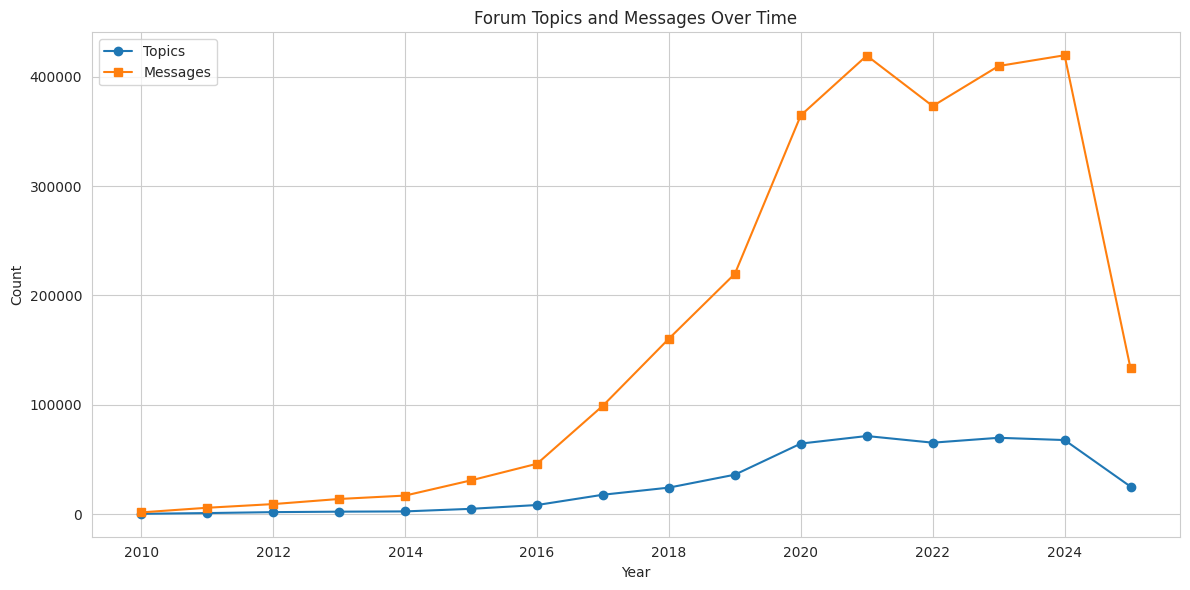

In [11]:
# Convert dates
forum_topics['CreationDate'] = pd.to_datetime(forum_topics['CreationDate'], errors='coerce')
forum_messages['PostDate'] = pd.to_datetime(forum_messages['PostDate'], errors='coerce')

# Extract year
forum_topics['Year'] = forum_topics['CreationDate'].dt.year
forum_messages['Year'] = forum_messages['PostDate'].dt.year

# Count per year
topics_per_year = forum_topics['Year'].value_counts().sort_index()
messages_per_year = forum_messages['Year'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(topics_per_year.index, topics_per_year.values, marker='o', label='Topics')
plt.plot(messages_per_year.index, messages_per_year.values, marker='s', label='Messages')

plt.title('Forum Topics and Messages Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

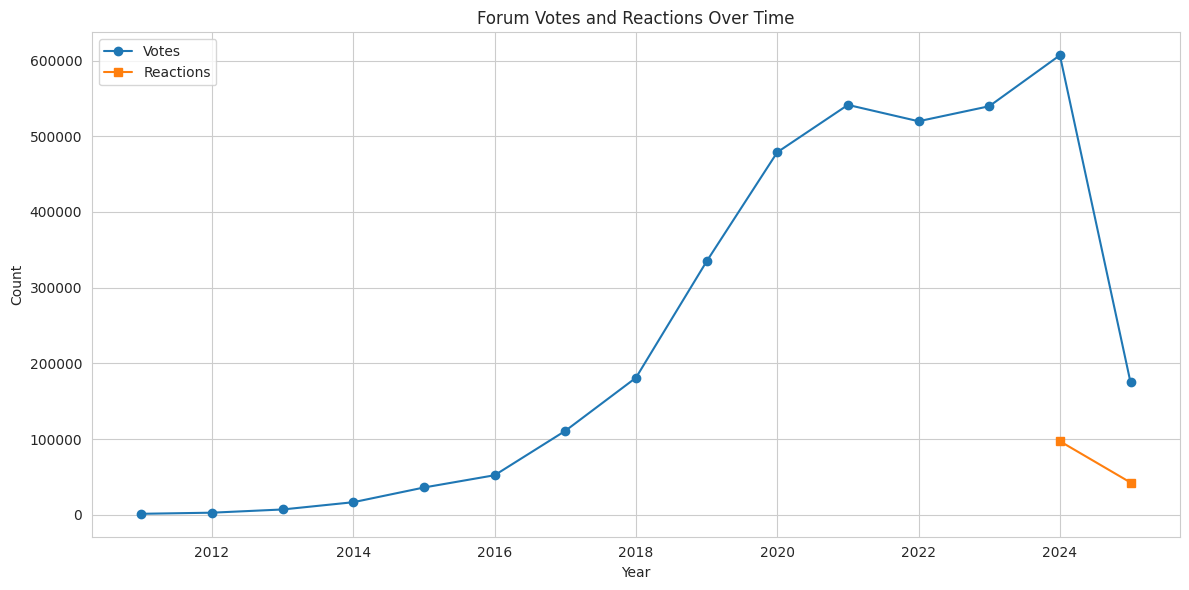

In [12]:
# Convert dates
forum_message_votes['VoteDate'] = pd.to_datetime(forum_message_votes['VoteDate'], errors='coerce')
forum_message_reactions['ReactionDate'] = pd.to_datetime(forum_message_reactions['ReactionDate'], errors='coerce')

# Extract year
forum_message_votes['Year'] = forum_message_votes['VoteDate'].dt.year
forum_message_reactions['Year'] = forum_message_reactions['ReactionDate'].dt.year

# Count per year
votes_per_year = forum_message_votes['Year'].value_counts().sort_index()
reactions_per_year = forum_message_reactions['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(votes_per_year.index, votes_per_year.values, marker='o', label='Votes')
plt.plot(reactions_per_year.index, reactions_per_year.values, marker='s', label='Reactions')

plt.title('Forum Votes and Reactions Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
forum_message_reactions['ReactionDate'].describe()

count                           139832
mean     2024-10-07 16:03:21.224326400
min                2024-03-28 00:00:00
25%                2024-06-08 00:00:00
50%                2024-09-12 00:00:00
75%                2025-02-02 00:00:00
max                2025-07-19 00:00:00
Name: ReactionDate, dtype: object

## Text analysis

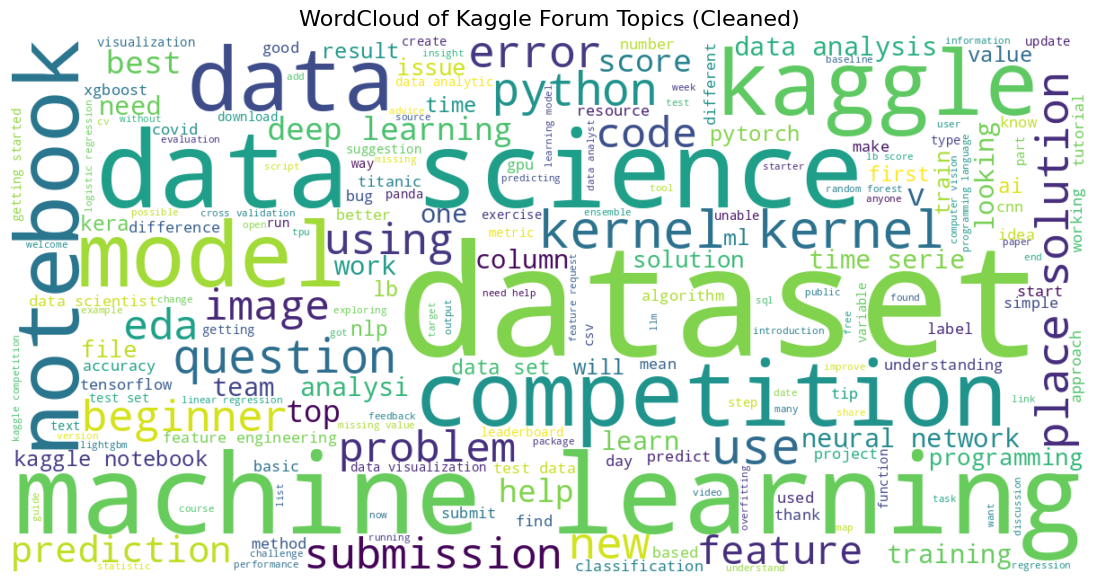

In [11]:
import re

# Remove words like 'deleted', 'delete' etc from titles via regex
pattern = re.compile(r'\b(delete|deleted|removal|removed|kernel deleted|deleted kernel)\b', re.IGNORECASE)
titles = titles.apply(lambda x: pattern.sub('', x))

# Join and clean extra spaces
text = ' '.join(titles.tolist())
text = re.sub(r'\s+', ' ', text).strip()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Kaggle Forum Topics (Cleaned)', fontsize=16)
plt.show()

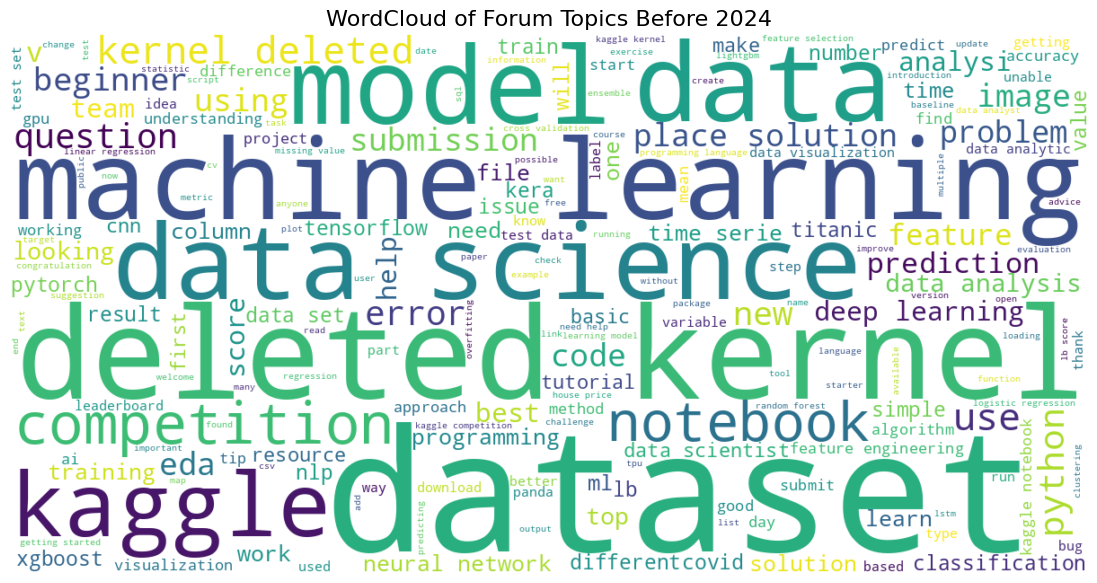

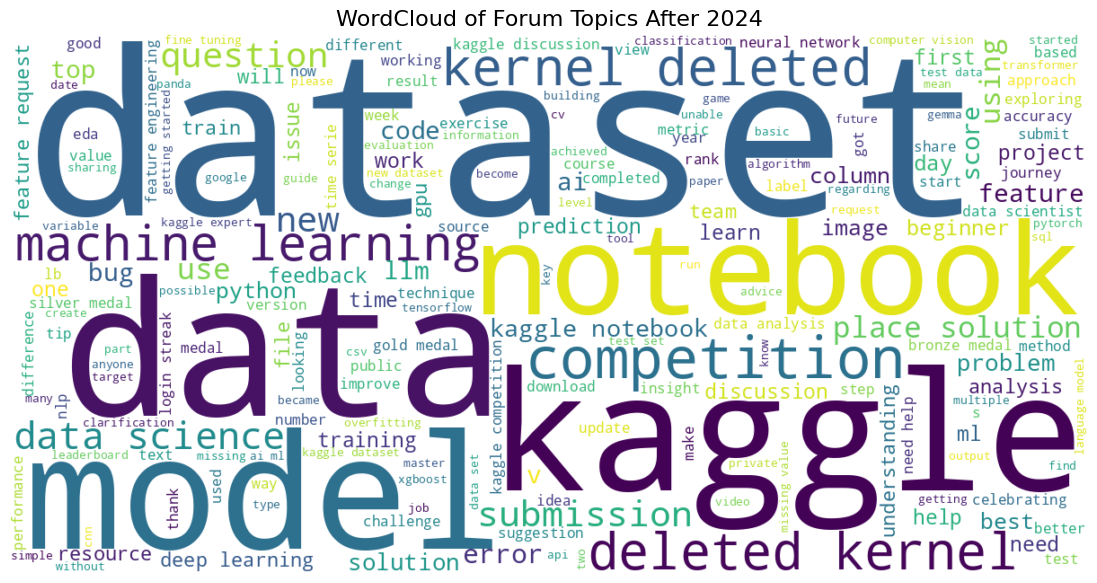

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
forum_topics = pd.read_csv('/kaggle/input/meta-kaggle/ForumTopics.csv')

# Convert dates and clean data
forum_topics['CreationDate'] = pd.to_datetime(forum_topics['CreationDate'], errors='coerce')
forum_topics = forum_topics.dropna(subset=['CreationDate', 'Title'])
forum_topics['Title'] = forum_topics['Title'].str.lower()

remove_words = ['deleted', 'delete', 'removal', 'removed']
forum_topics['CleanTitle'] = forum_topics['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove_words]))

# Split datasets
before_2024 = forum_topics[forum_topics['CreationDate'].dt.year < 2024]
after_2024 = forum_topics[forum_topics['CreationDate'].dt.year >= 2024]

# Function to plot wordcloud
def plot_wordcloud(text_series, title):
    text = ' '.join(text_series.tolist())
    wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Plot for Before 2024
plot_wordcloud(before_2024['CleanTitle'], 'WordCloud of Forum Topics Before 2024')

# Plot for After 2024
plot_wordcloud(after_2024['CleanTitle'], 'WordCloud of Forum Topics After 2024')

In [24]:
kernels = pd.read_csv('/kaggle/input/meta-kaggle/Kernels.csv')

In [25]:
forum_kernel = forum_topics.merge(kernels, left_on='KernelId', right_on='Id', how='inner')

In [26]:
forum_kernel['Year'] = pd.to_datetime(forum_kernel['CreationDate_x']).dt.year
kernels['Year'] = pd.to_datetime(kernels['CreationDate']).dt.year

forum_topic_kernel_count = forum_kernel['Year'].value_counts().sort_index()
kernel_count = kernels['Year'].value_counts().sort_index()

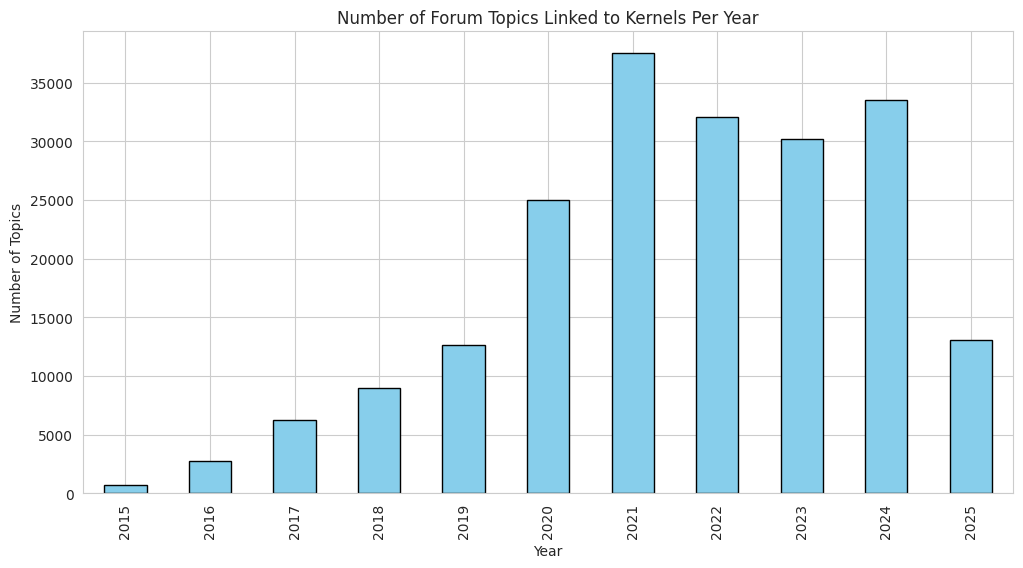

In [27]:
forum_topic_kernel_count.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Number of Forum Topics Linked to Kernels Per Year')
plt.ylabel('Number of Topics')
plt.xlabel('Year')
plt.show()

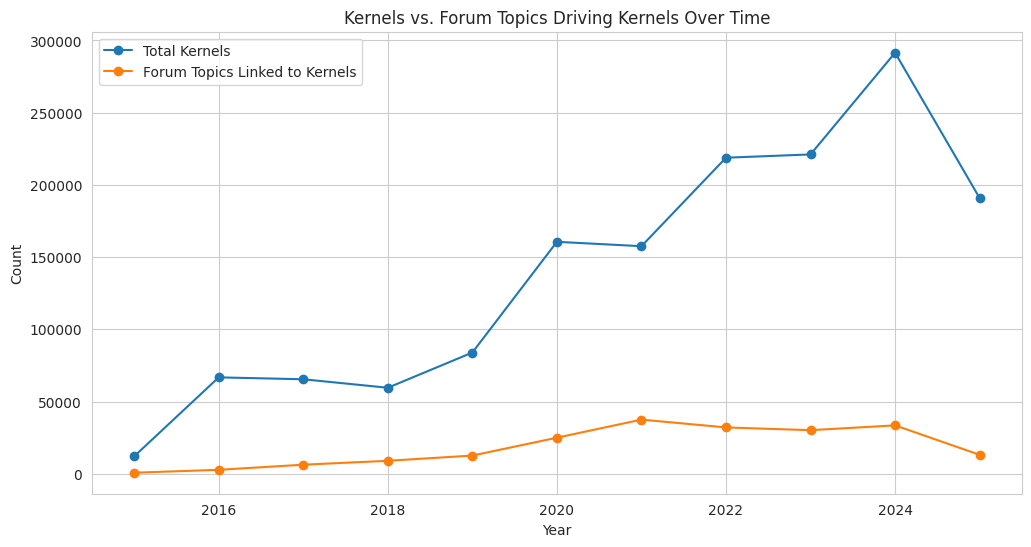

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(kernel_count.index, kernel_count.values, marker='o', label='Total Kernels')
plt.plot(forum_topic_kernel_count.index, forum_topic_kernel_count.values, marker='o', label='Forum Topics Linked to Kernels')

plt.title('Kernels vs. Forum Topics Driving Kernels Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

## message analysis

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
def clean_and_normalize(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    # Remove stopwords, apply stemming and lemmatization
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
    return ' '.join(words)

In [15]:
forum_messages['CleanMessage'] = forum_messages['Message'].apply(clean_and_normalize)

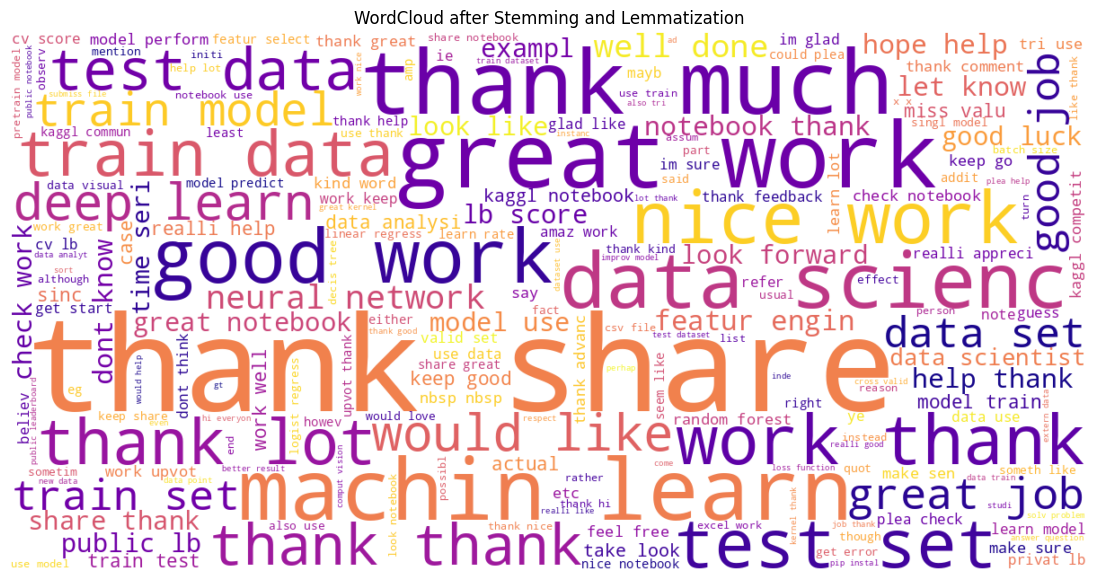

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(forum_messages['CleanMessage'].dropna().tolist())

wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      stopwords=stop_words,
                      colormap='plasma').generate(all_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud after Stemming and Lemmatization')
plt.show()